In [ ]:
#Raghavendra swamy

In [17]:
!pip install keras-tuner

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('Alphabets_data.csv')

In [20]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [21]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [22]:
df.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [24]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [25]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [26]:
df.dtypes

,0
letter,object
xbox,int64
ybox,int64
width,int64
height,int64
onpix,int64
xbar,int64
ybar,int64
x2bar,int64
y2bar,int64


In [27]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

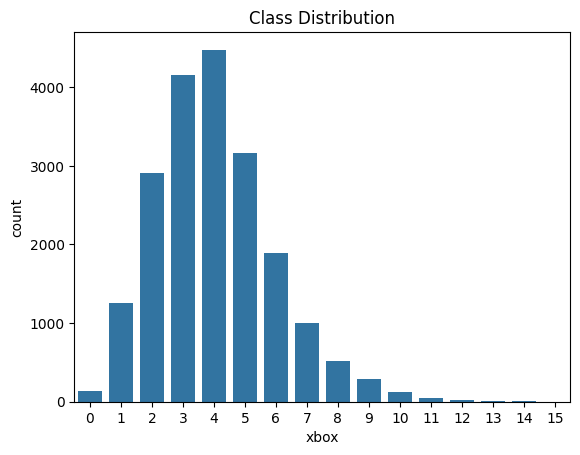

In [30]:
# Visualize class distribution
sns.countplot(x='xbox', data=df)
plt.title("Class Distribution")
plt.show()


In [36]:
# Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



In [37]:
# Split dataset into features and target
X = df.drop('xbox', axis=1)
y = df['yedgex']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Hidden layer with 64 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)  # Adjust epochs and batch_size as needed

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
# Evaluate the model
print(classification_report(y_test, y_pred_classes))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 7.5109e-04 - loss: -53.4617 - val_accuracy: 6.2500e-04 - val_loss: -411.3108
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 7.7555e-04 - loss: -703.9609 - val_accuracy: 6.2500e-04 - val_loss: -1800.7054
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 6.5128e-04 - loss: -2356.3364 - val_accuracy: 6.2500e-04 - val_loss: -4132.7520
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 4.5213e-04 - loss: -4947.9688 - val_accuracy: 6.2500e-04 - val_loss: -7290.7974
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 4.7157e-04 - loss: -8295.1758 - val_accuracy: 6.2500e-04 - val_loss: -11172.7900
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0013 - loss: -12399.1455 - val_accuracy: 6.2500e-04 - val_loss: -15686.4814
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 8.6905e-04 - loss: -17240.7188 - val_accuracy: 6.2500e-04 - val_loss: -20785.6680
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


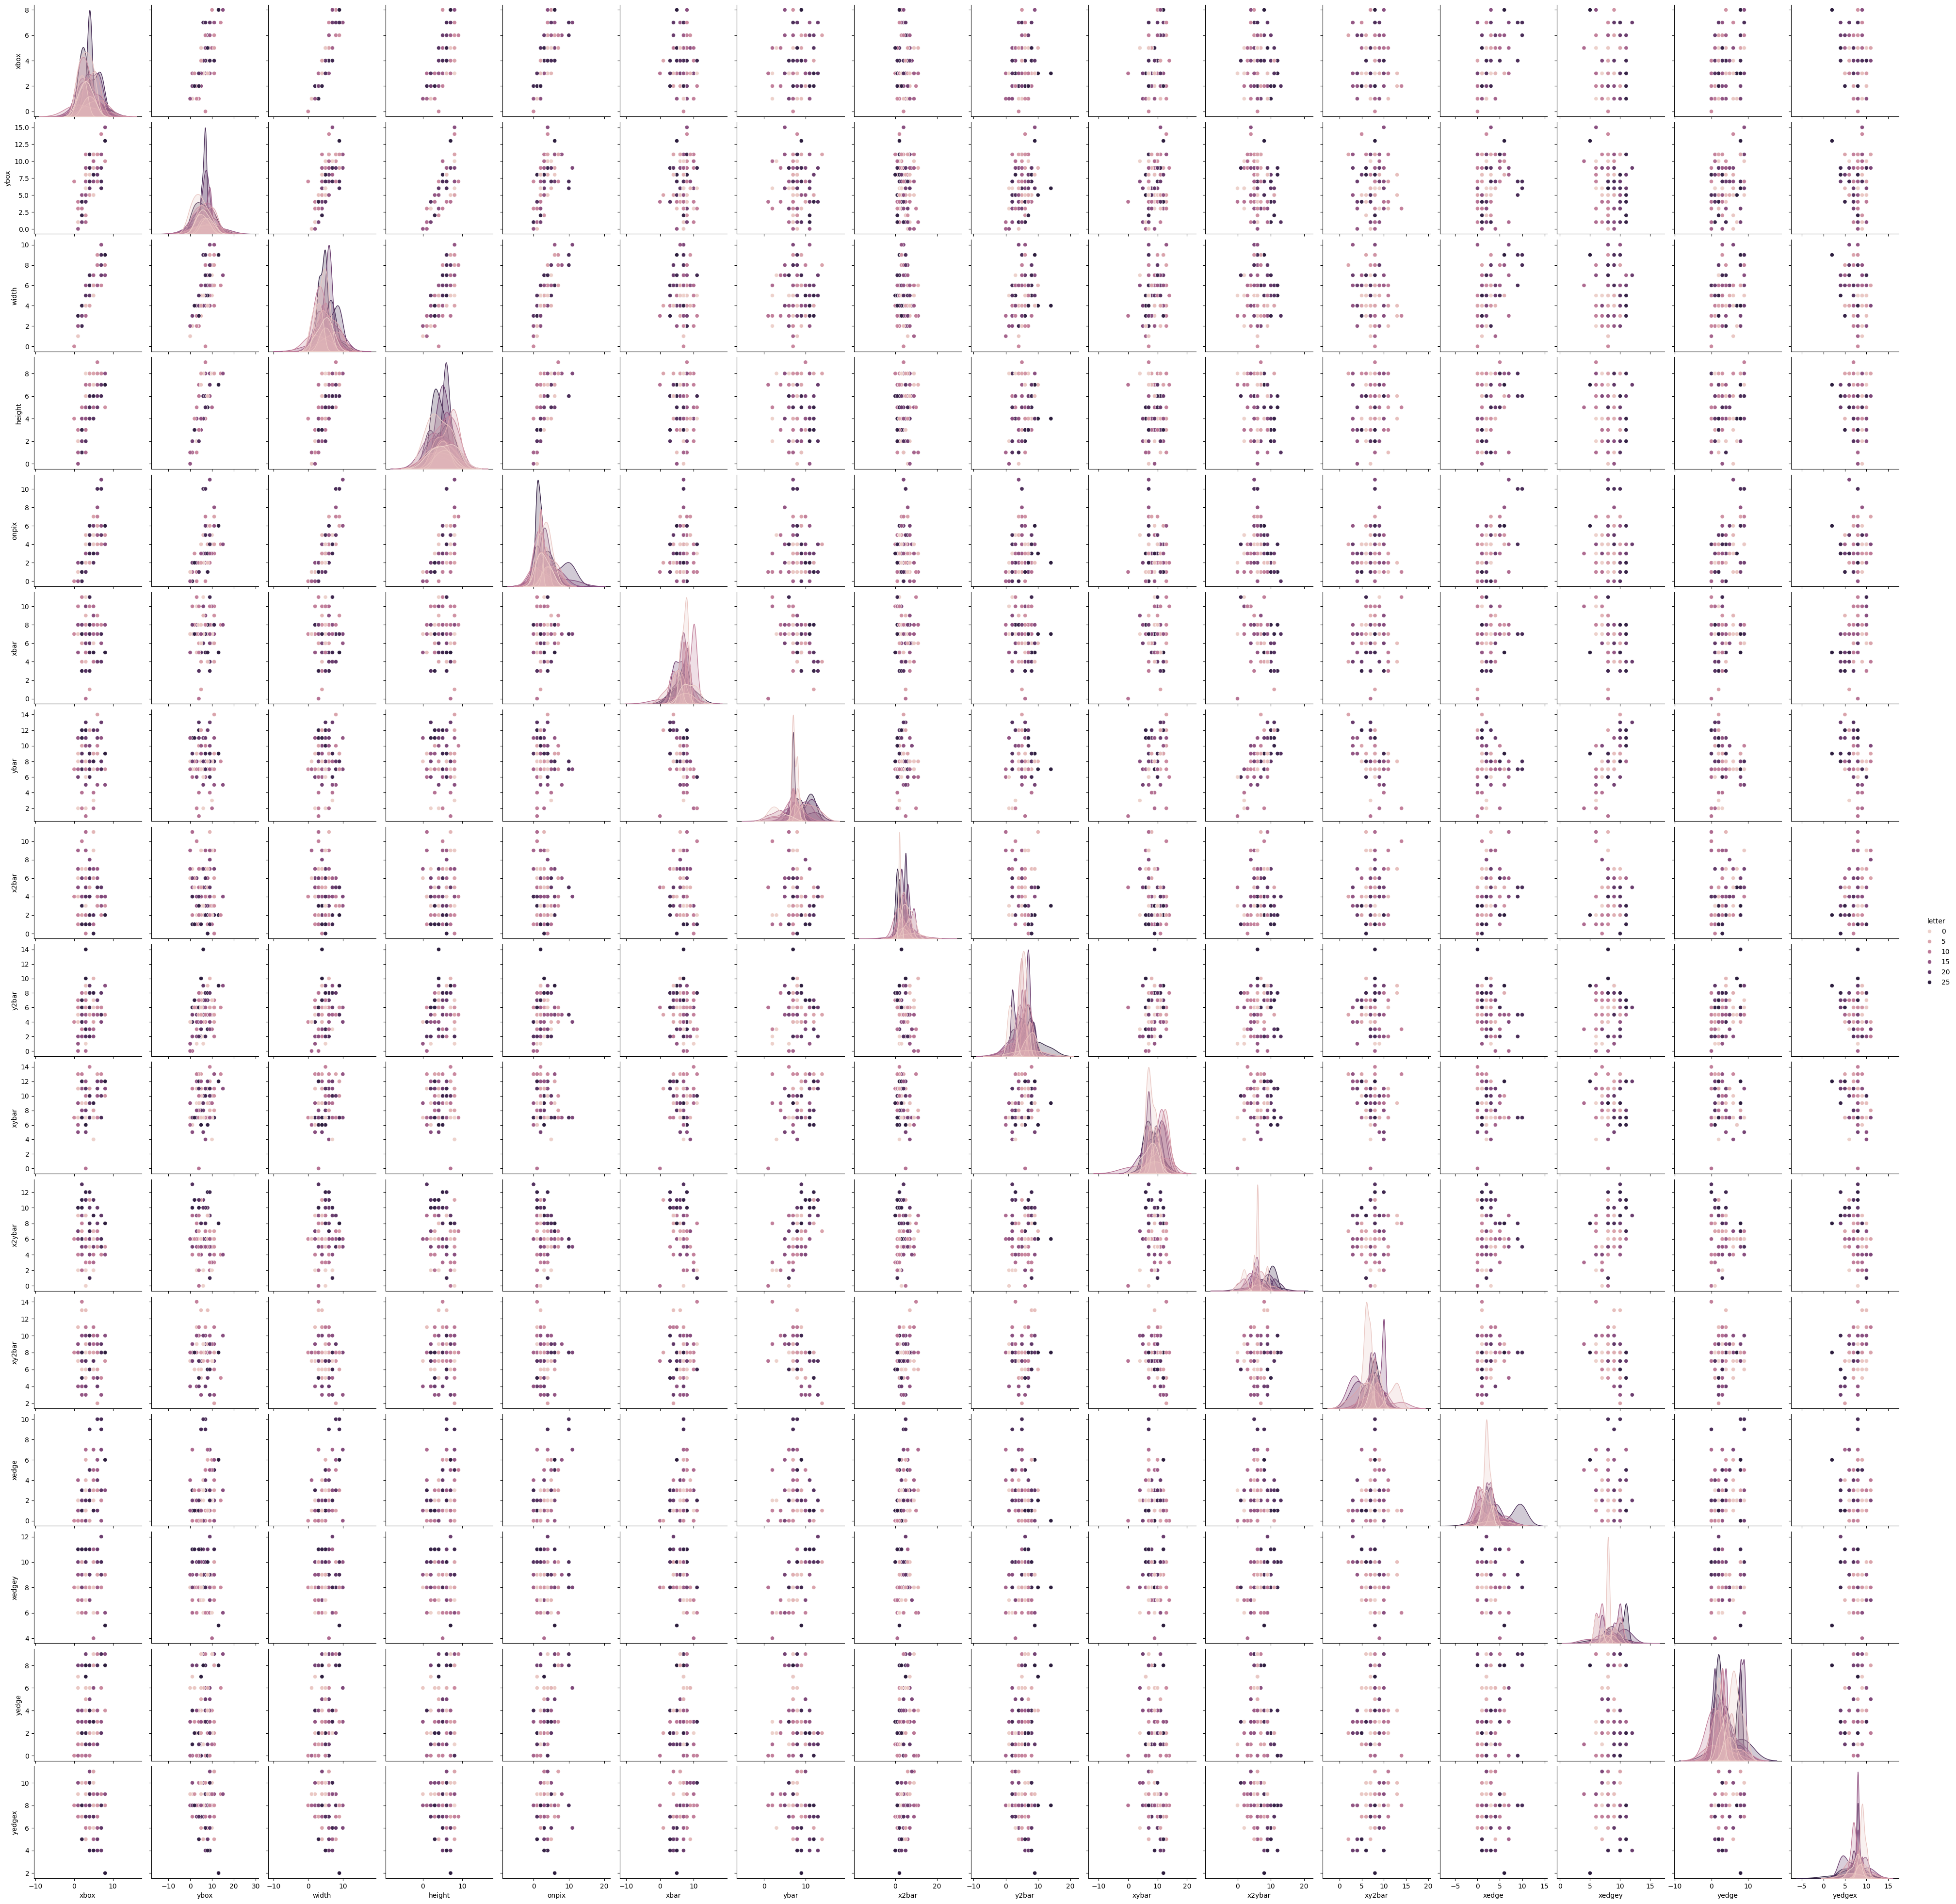

In [56]:
# Step 4: Data Visualization
# Assuming 'letter' column represents
sns.pairplot(df.sample(100), hue='letter')
plt.show()


In [58]:
# Step 2: Define the Model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=16, max_value=128, step=16),
                    activation=hp.Choice('activation_input', ['relu', 'tanh']),
                    input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
                        activation=hp.Choice('activation_hidden', ['relu', 'tanh'])))
    model.add(Dense(y.nunique(), activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0001, 0.00001])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model




Trial 30 Complete [00h 00m 31s]
val_accuracy: 0.9984375238418579

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 06m 16s
Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5635 - loss: 1.3867 - val_accuracy: 0.9650 - val_loss: 0.1975
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.1374 - val_accuracy: 0.9884 - val_loss: 0.0474
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0447 - val_accuracy: 0.9906 - val_loss: 0.0264
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0264 - val_accuracy: 0.9962 - val_loss: 0.0122
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0160 - val_accuracy: 0.9956 - val_loss: 0.0091
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9969 - loss: 0.0147 - val_accuracy: 0.9984 - val_loss: 0.0066
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9975 - loss: 0.0098 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.36      1.00      0.53         4
           2       0.00      0.00      0.00         6
           3       1.00      1.00      1.00        31
           4       1.00      0.98      0.99        94
           5       0.99      0.97      0.98       196
           6       0.98      0.99      0.99       353
           7       1.00      1.00      1.00       712
           8       1.00      1.00      1.00      1596
           9       1.00      1.00      1.00       485
          10       1.00      1.00      1.00       308
          11       1.00      1.00      1.00       175
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         1

    accuracy                           1.00      4000
   macro avg       0.82      0.86      0.83      4000
weighted avg       1.00   

In [59]:

# Step 3: Hyperparameter Tuning
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='tuner_results',
    project_name='alphabet_classification'
)

tuner.search(X_train, y_train, validation_split=0.2, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
model = tuner.hypermodel.build(best_hps)

Reloading Tuner from tuner_results/alphabet_classification/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Step 4: Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5197 - loss: 1.5116 - val_accuracy: 0.9478 - val_loss: 0.2986
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9553 - loss: 0.2257 - val_accuracy: 0.9778 - val_loss: 0.0884
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0805 - val_accuracy: 0.9822 - val_loss: 0.0474
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0482 - val_accuracy: 0.9912 - val_loss: 0.0254
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9946 - loss: 0.0275 - val_accuracy: 0.9941 - val_loss: 0.0170
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0225 - val_accuracy: 0.9950 - val_loss: 0.0166
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9973 - loss: 0.0127 - val_accuracy: 0.9969 - val_loss: 0.0113
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.

In [61]:
# Step 5: Evaluate the Model
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

# Save the best model
model.save("best_ann_model.h5")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         4
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        94
           5       1.00      1.00      1.00       196
           6       1.00      1.00      1.00       353
           7       1.00      1.00      1.00       712
           8       1.00      1.00      1.00      1596
           9       1.00      1.00      1.00       485
          10       1.00      1.00      1.00       308
          11       1.00      1.00      1.00       175
          12       1.00      1.00      1.00        29
          13       0.90      1.00      0.95         9
          14       0.00      0.00      0.00         1

    accuracy                           1.00      4000
   macro avg       0.84      0.86      0.84      4000
weighted avg       1.00   